In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Initial CSV Read

xGS_Total = pd.read_csv(r'CSVs\International\Int_xGS_Total.csv' ,encoding='latin-1')
xGA_Total = pd.read_csv(r'CSVs\International\Int_xGA_Total.csv' ,encoding='latin-1')
# loading linear algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Get corrs between Gls and features
xGS_corrs = abs(xGS_Total.corr())['Gls'].sort_values(ascending=False)
xGA_corrs = abs(xGA_Total.corr())['O. Gls'].sort_values(ascending=False)

In [5]:
# It looks like G/Sh is the highest correlated feature with Gls.
xGS_corrs

Gls        1.000000
G/Sh       0.812597
SoT        0.779099
G/SoT      0.687219
Sh         0.599977
Poss       0.576907
SoT%       0.506920
PKatt      0.310739
MP         0.285975
O. CrdY    0.267001
CrdY       0.264677
Int        0.217464
Year       0.166428
CrdR       0.133139
Fld        0.121539
TklW       0.062697
O. TklW    0.062034
Age        0.048508
Name: Gls, dtype: float64

In [4]:
xGA_corrs

O. Gls      1.000000
O. SoT      0.819783
O. G/Sh     0.775568
O. Sh       0.679150
O. G/SoT    0.575009
O. SoT%     0.542885
O. Poss     0.538468
CrdY        0.406690
O. PKatt    0.330771
O. CrdY     0.278928
O. Int      0.178376
O. CrdR     0.132090
Year        0.099312
TklW        0.084096
O. Fld      0.073035
O. MP       0.052627
O. Age      0.045203
O. TklW     0.016299
Name: O. Gls, dtype: float64

In [ ]:
xGS_Total.columns

In [7]:
# first ML model for XGS & xGA, dropping irrelevant features AND FEATURES THAT ARE VERY SIMILAR 
xGS_Column_Drop_List = ['Key','Year','Competition','Squad','Age','Sh','MP','G/SoT','CrdR','Fld','TklW','O. TklW','G/Sh']
xGA_Column_Drop_List = ['Key','Year','Competition','Squad','O. Age','O. MP','O. G/SoT','O. CrdR','O. Fld', 'O. TklW', 'TklW','O. G/Sh']

xGS_Model_1 = xGS_Total.drop(xGS_Column_Drop_List, axis=1)
xGA_Model_1 = xGA_Total.drop(xGA_Column_Drop_List, axis=1)

In [ ]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_1_features = xGS_Model_1.drop(['Confederation','Gls'], axis=1)
xGA_Model_1_features = xGA_Model_1.drop(['Confederation','O. Gls'], axis=1)

#xGS_scaler = StandardScaler().fit(xGS_Model_1_features)
#xGA_scaler = StandardScaler().fit(xGA_Model_1_features)


#xGS_scaler_df = pd.DataFrame(xGS_scaler.transform(xGS_Model_1_features), columns = xGS_Model_1_features.columns)
#xGA_scaler_df = pd.DataFrame(xGA_scaler.transform(xGA_Model_1_features), columns = xGA_Model_1_features.columns)

xGS_scaler_df['Gls'] = xGS_Model_1['Gls']
xGA_scaler_df['O. Gls'] = xGA_Model_1['O. Gls']
xGS_scaler_df['Confederation'] = xGS_Model_1['Confederation']
xGA_scaler_df['Confederation'] = xGA_Model_1['Confederation']

In [8]:
# Create final model variable and one-hot encode Confederation

xGS_Model_1_Final = pd.get_dummies(xGS_Model_1, columns=['Confederation'])
xGA_Model_1_Final = pd.get_dummies(xGA_Model_1, columns=['Confederation'])

In [ ]:
xGS_Model_1_Final

In [9]:
# Get features and target for both models

xGS_X = xGS_Model_1_Final.drop('Gls', axis=1).values
xGS_y = xGS_Model_1_Final['Gls'].values

xGA_X = xGA_Model_1_Final.drop('O. Gls', axis=1).values
xGA_y = xGA_Model_1_Final['O. Gls']

In [10]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train, xGS_X_test, xGS_y_train, xGS_y_test = train_test_split(xGS_X, xGS_y, random_state=42, test_size=.25)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train, xGA_X_test, xGA_y_train, xGA_y_test = train_test_split(xGA_X, xGA_y, random_state=42, test_size=.25)

In [11]:
# Evaluate Model function

def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

In [ ]:
# xGS Model EXPLORATION:

TRAINING SET
root mean squared error (RMSE): 0.39145543711434994
R-squared (R2 ): 0.6742001336548774
MAE 0.30511229088731723

Testing SET
root mean squared error (RMSE): 0.41169773426174544
R-squared (R2 ): 0.6187569578635318
MAE 0.30596102115711266


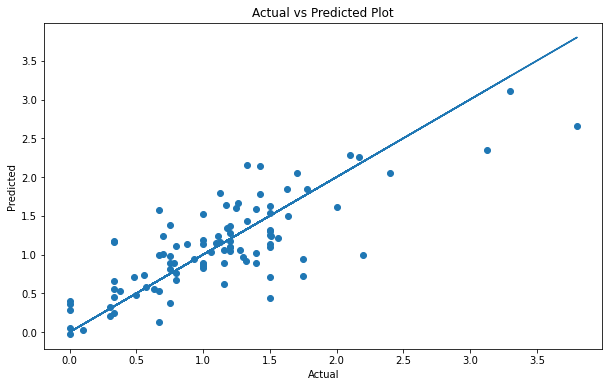

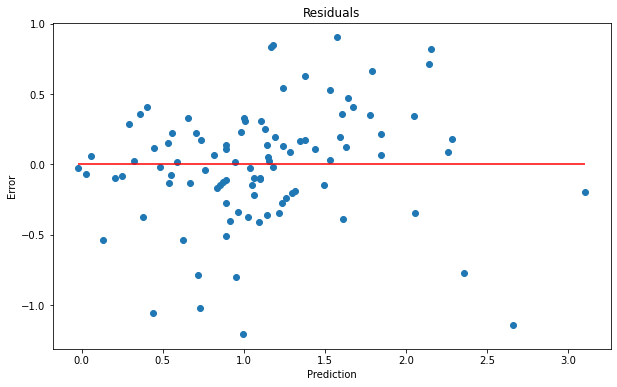

In [12]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
# Elastic net, DecisionTreeRegressor, 

In [ ]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.06983147686529075
R-squared (R2 ): 0.9896321502043044
MAE 0.052496035592396885

Testing SET
root mean squared error (RMSE): 0.43068597811726206
R-squared (R2 ): 0.5827787328070536
MAE 0.3284721441013972


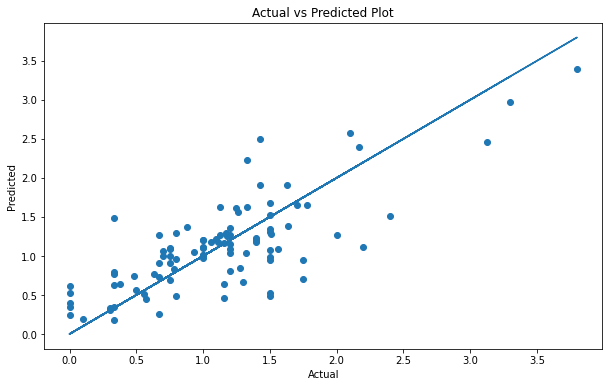

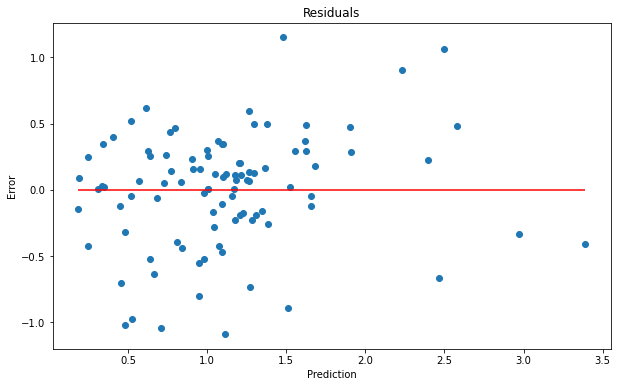

In [14]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=600, learning_rate=.05)
gb = evaluateModel(gb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.14596195088406572
R-squared (R2 ): 0.9547034045161703
MAE 0.1094153633217995

Testing SET
root mean squared error (RMSE): 0.4499220748108076
R-squared (R2 ): 0.5446770132043621
MAE 0.3447492783505154


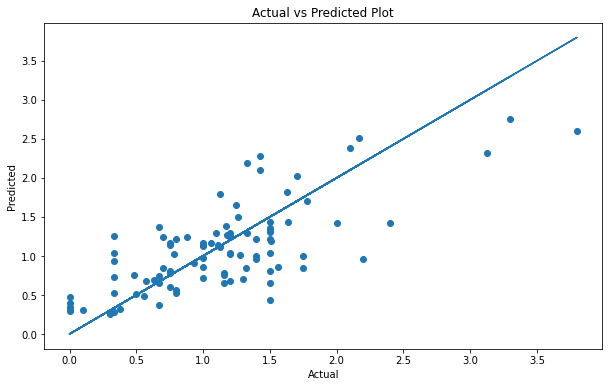

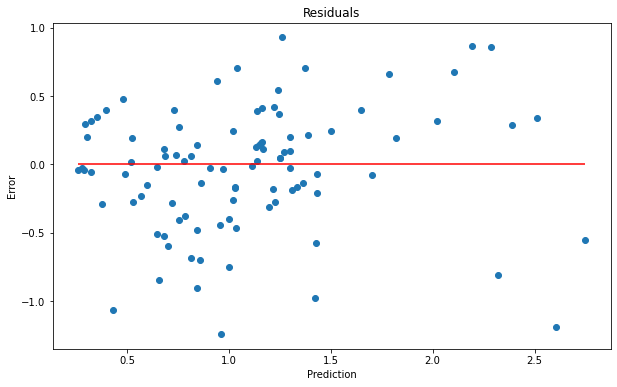

In [15]:
rf = RandomForestRegressor(n_estimators = 250)
rf = evaluateModel(rf, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.2128623847753553
R-squared (R2 ): 0.9339266832446738
MAE 0.16489484973861987

Testing SET
root mean squared error (RMSE): 0.5248589356086777
R-squared (R2 ): 0.6574563402267326
MAE 0.39072438352733485


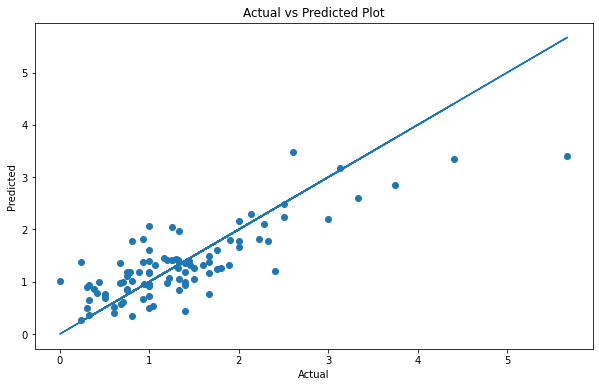

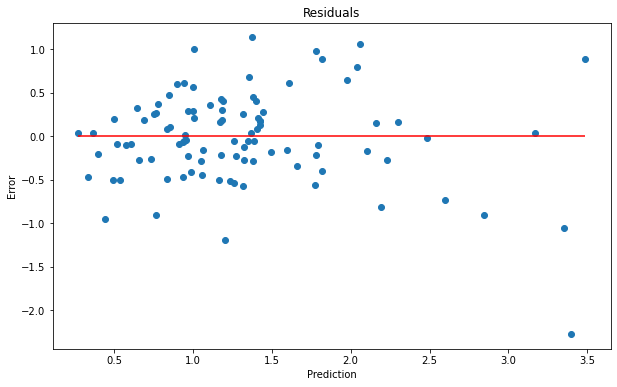

In [16]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

In [ ]:
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

In [ ]:
xGS_Total.columns

In [ ]:
xGA_Total.columns

In [ ]:
# Second Model Attempt - Keeping similar metrics in to see if predictive abilities increase

 
xGS_Column_Drop_List2 = ['Key','Year','Competition','Squad','Age','MP','G/SoT','TklW','O. TklW','G/Sh']
xGA_Column_Drop_List2 = ['Key','Year','Competition','Squad','O. Age','O. MP','O. G/SoT','O. Fld', 'O. TklW', 'TklW','O. G/Sh']

xGS_Model_2 = xGS_Total.drop(xGS_Column_Drop_List2, axis=1)
xGA_Model_2 = xGA_Total.drop(xGA_Column_Drop_List2, axis=1)

In [ ]:
xGS_Model_2

In [ ]:
xGA_corrs

In [ ]:
xGA_Model_2

In [ ]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_2_features = xGS_Model_2.drop(['Confederation','Gls'], axis=1)
xGA_Model_2_features = xGA_Model_2.drop(['Confederation','O. Gls'], axis=1)

#xGS_scaler2 = StandardScaler().fit(xGS_Model_2_features)
#xGA_scaler2 = StandardScaler().fit(xGA_Model_2_features)


#xGS_scaler_df2 = pd.DataFrame(xGS_scaler2.transform(xGS_Model_2_features), columns = xGS_Model_2_features.columns)
#xGA_scaler_df2 = pd.DataFrame(xGA_scaler2.transform(xGA_Model_2_features), columns = xGA_Model_2_features.columns)

xGS_scaler_df2['Gls'] = xGS_Model_2['Gls']
xGA_scaler_df2['O. Gls'] = xGA_Model_2['O. Gls']
xGS_scaler_df2['Confederation'] = xGS_Model_2['Confederation']
xGA_scaler_df2['Confederation'] = xGA_Model_2['Confederation']

In [ ]:
# Create final model variable and one-hot encode Confederation

xGS_Model_2_Final = pd.get_dummies(xGS_Model_2, columns=['Confederation'])
xGA_Model_2_Final = pd.get_dummies(xGA_Model_2, columns=['Confederation'])

In [ ]:
# Get features and target for both models

xGS_X2 = xGS_Model_2_Final.drop('Gls', axis=1).values
xGS_y2 = xGS_Model_2_Final['Gls'].values

xGA_X2 = xGA_Model_2_Final.drop('O. Gls', axis=1).values
xGA_y2 = xGA_Model_2_Final['O. Gls']

In [ ]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train2, xGS_X_test2, xGS_y_train2, xGS_y_test2 = train_test_split(xGS_X2, xGS_y2, random_state=42, test_size=.1)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train2, xGA_X_test2, xGA_y_train2, xGA_y_test2 = train_test_split(xGA_X2, xGA_y2, random_state=42, test_size=.1)

In [ ]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
en = ElasticNet()
en = evaluateModel(en,xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=600, learning_rate=.05)
gb = evaluateModel(gb, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
rf = RandomForestRegressor(n_estimators = 250)
rf = evaluateModel(rf, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
# xGA Model 2 Exploration
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [ ]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [ ]:
# Final Ridge Models
lasso_xGS =  ridge.fit(xGS_X2,xGS_y2)
lasso_xGA = ridge.fit(xGA_X2, xGA_y2)

In [ ]:
# xGS and xGA Preds using ridge regeression on second model

xGS_Preds = lasso_xGS.predict()
xGA_Preds = lasso_xGA.predict(xGA_y2)

In [ ]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=400)
gb = evaluateModel(gb, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [ ]:
rf = RandomForestRegressor(n_estimators = 400)
rf = evaluateModel(rf, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [ ]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=600, learning_rate=.05)
gb = evaluateModel(gb, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [ ]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)